In [1001]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint

In [1002]:
L= 7
n = L  # Dimension of the vector x
m = 1.0  # Mass (assuming same for all components)
gamma = 1 # Friction coefficient (assuming same for all components)
k = 0.1  # elastic constant
epsilon = 0.003  # noise

lambda_decay = 0.001  # Decay rate of the noise
dt    =  0.05  # Time step
tmax  =  700
num_steps =  int(tmax / dt)
muright=0.003 # friction when move to right
muleft=0.004 # friction when move to left

In [1003]:
A=np.zeros((n+2,n+2))
for i in range(0,n+1):
    A[i,i]=-2
    A[i,i+1]=1
    A[i+1,i]=1
A[0,0]=1;A[-1,-1]=1;A[0,1]=0;A[-1,-2]=0;print(A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [1005]:
def drift(y, t):
    x_pos = y[:n]  # Position components are in the first half of the state vector
    v = y[n:]  # Velocity components are in the second half of the state vector
    dx_dt = v  # Deterministic part for position
    x_=np.zeros((n+2))
    x_[1:-1]=x_pos
    x_[-1]=1
    F= (A@x_.reshape(-1,1)).reshape(-1)[1:-1]
    friction = np.zeros_like(v)
    friction[v>0]=-muright
    friction[v<0]=+muleft
    dv_dt = F*k/m+ friction - gamma * v / m      
    return np.concatenate([dx_dt, dv_dt])

def diffusion(y, t):
    decay_factor = np.exp(-lambda_decay * t)
    noise_strength = epsilon * decay_factor # No noise in position, noise only in velocity
    diff_matrix = np.zeros((2 * n, 2 * n))
    #diff_matrix[n:, n:] = noise_strength * np.eye(n)  #uncorrelated noise
    diff_matrix[n:, n:] = noise_strength * np.ones((n,n)) #same noise for different blocks
    return diff_matrix

In [1006]:
x0 = np.zeros(n)  # Initial position vector (all zeros)
v0 = np.zeros(n)  # Initial velocity vector (all zeros)
y0 = np.concatenate([x0, v0])  # Combined initial condition

In [1007]:
tspan = np.linspace(0, num_steps * dt, num_steps)                             
result = sdeint.itoint(drift, diffusion, y0, tspan)

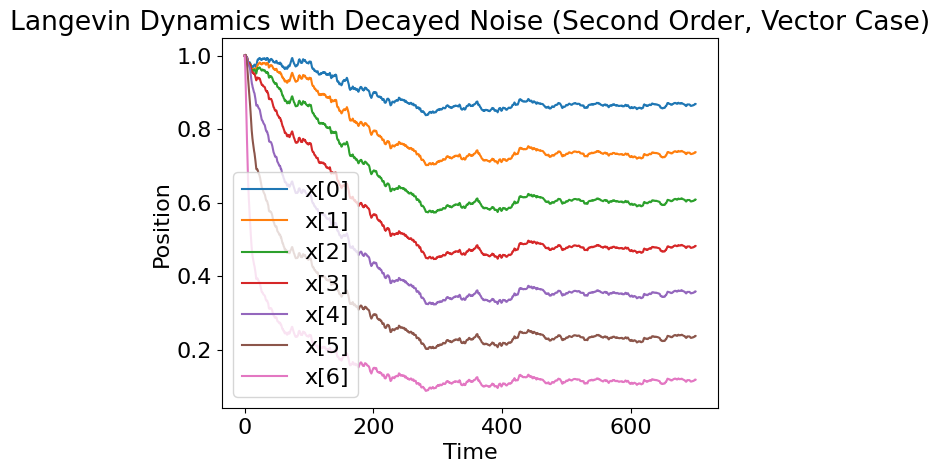

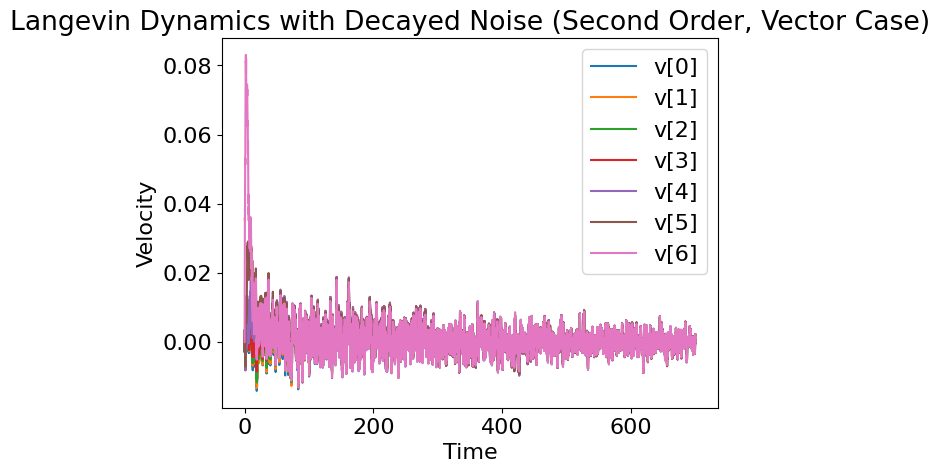

In [1008]:
positions =result[:, :n]  # Extract position components from the result
velocities=result[:, n:]  # Extract velocity components from the result


# Plot position components
for i in range(n):
    plt.plot(tspan, 1-positions[:, i], label=f'x[{i}]')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Langevin Dynamics with Decayed Noise (Second Order, Vector Case)')
plt.legend()
plt.show()
                                      
# Optionally, plot velocity components
for i in range(n):
    plt.plot(tspan, velocities[:, i], label=f'v[{i}]')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Langevin Dynamics with Decayed Noise (Second Order, Vector Case)')
plt.legend()
plt.show()